# Actividad


---
Por: Ángela Córdoba


---




In [1]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# Generación de datos de ejemplo
np.random.seed(0)
dates = pd.date_range(start='2022-01-01', end='2022-12-31')
values = np.arange(len(dates))*.2 + np.random.rand(len(dates))*50
ts = pd.Series(values, index=dates)

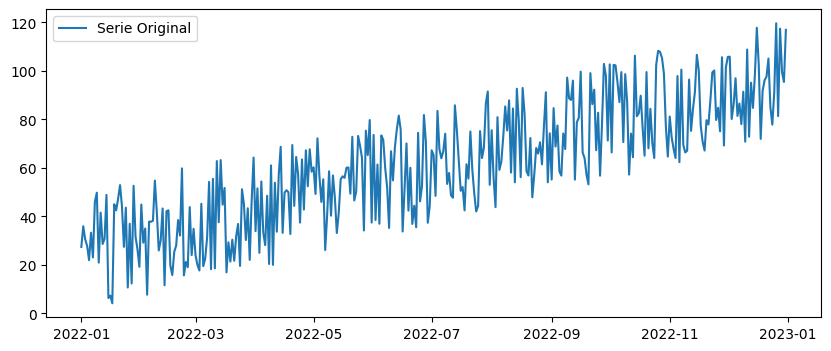

In [3]:
# Gráfica de la serie original
# Permite observar la tendencia y variabilidad de los datos
plt.figure(figsize=(10, 4))
plt.plot(ts, label='Serie Original')
plt.legend()
plt.show()

In [4]:
# Descomposición de la serie de tiempo
# Tendencia: dirección general en la que los datos tienden a moverse
# Estacionalidad: patrones cíclicos o fluctuaciones periódicas
# Residuos: variabilidad no explicada por la tendencia y la estacionalidad (aleatoridad)

decomposition = seasonal_decompose(ts, model='additive')

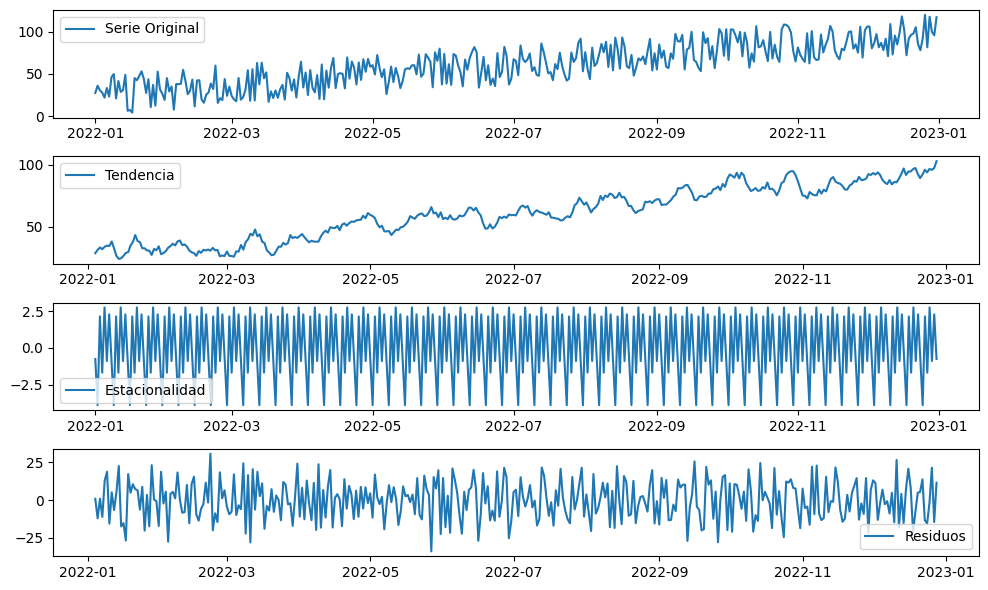

In [5]:
# Gráfica de la descomposición

# Gráfica de la serie original
plt.figure(figsize=(10, 6))
plt.subplot(411)
plt.plot(ts, label='Serie Original')
plt.legend()

# Gráfica de la tendencia
plt.subplot(412)
plt.plot(decomposition.trend, label='Tendencia')
plt.legend()

# Gráfica de la estacionalidad
plt.subplot(413)
plt.plot(decomposition.seasonal, label='Estacionalidad')
plt.legend()

# Gráfica de los residuos
plt.subplot(414)
plt.plot(decomposition.resid, label='Residuos')
plt.legend()

plt.tight_layout()
plt.show()

# Ejercicio

**Dataset:** https://www.kaggle.com/datasets/sumanthvrao/daily-climate-time-series-data

In [9]:
df_train = pd.read_csv('DailyDelhiClimateTrain.csv')
df_train.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2013-01-01,10.000000,84.500000,0.000000,1015.666667
1,2013-01-02,7.400000,92.000000,2.980000,1017.800000
2,2013-01-03,7.166667,87.000000,4.633333,1018.666667
3,2013-01-04,8.666667,71.333333,1.233333,1017.166667
4,2013-01-05,6.000000,86.833333,3.700000,1016.500000


In [10]:
df_test = pd.read_csv('DailyDelhiClimateTest.csv')
df_test.head()

,date,meantemp,humidity,wind_speed,meanpressure
0,2017-01-01,15.913043,85.869565,2.743478,59.000000
1,2017-01-02,18.500000,77.222222,2.894444,1018.277778
2,2017-01-03,17.111111,81.888889,4.016667,1018.333333
3,2017-01-04,18.700000,70.050000,4.545000,1015.700000
4,2017-01-05,18.388889,74.944444,3.300000,1014.333333


In [11]:
print(df_train.describe())
print(df_test.describe())

          meantemp     humidity   wind_speed  meanpressure
count  1462.000000  1462.000000  1462.000000   1462.000000
mean     25.495521    60.771702     6.802209   1011.104548
std       7.348103    16.769652     4.561602    180.231668
min       6.000000    13.428571     0.000000     -3.041667
25%      18.857143    50.375000     3.475000   1001.580357
50%      27.714286    62.625000     6.221667   1008.563492
75%      31.305804    72.218750     9.238235   1014.944901
max      38.714286   100.000000    42.220000   7679.333333
         meantemp    humidity  wind_speed  meanpressure
count  114.000000  114.000000  114.000000    114.000000
mean    21.713079   56.258362    8.143924   1004.035090
std      6.360072   19.068083    3.588049     89.474692
min     11.000000   17.750000    1.387500     59.000000
25%     16.437198   39.625000    5.563542   1007.437500
50%     19.875000   57.750000    8.069444   1012.739316
75%     27.705357   71.902778   10.068750   1016.739583
max     34.500000   9

In [12]:
df_train.set_index('date', inplace=True)
print(df_train.head())

df_test.set_index('date', inplace=True)
print(df_test.head())

             meantemp   humidity  wind_speed  meanpressure
date                                                      
2013-01-01  10.000000  84.500000    0.000000   1015.666667
2013-01-02   7.400000  92.000000    2.980000   1017.800000
2013-01-03   7.166667  87.000000    4.633333   1018.666667
2013-01-04   8.666667  71.333333    1.233333   1017.166667
2013-01-05   6.000000  86.833333    3.700000   1016.500000
             meantemp   humidity  wind_speed  meanpressure
date                                                      
2017-01-01  15.913043  85.869565    2.743478     59.000000
2017-01-02  18.500000  77.222222    2.894444   1018.277778
2017-01-03  17.111111  81.888889    4.016667   1018.333333
2017-01-04  18.700000  70.050000    4.545000   1015.700000
2017-01-05  18.388889  74.944444    3.300000   1014.333333


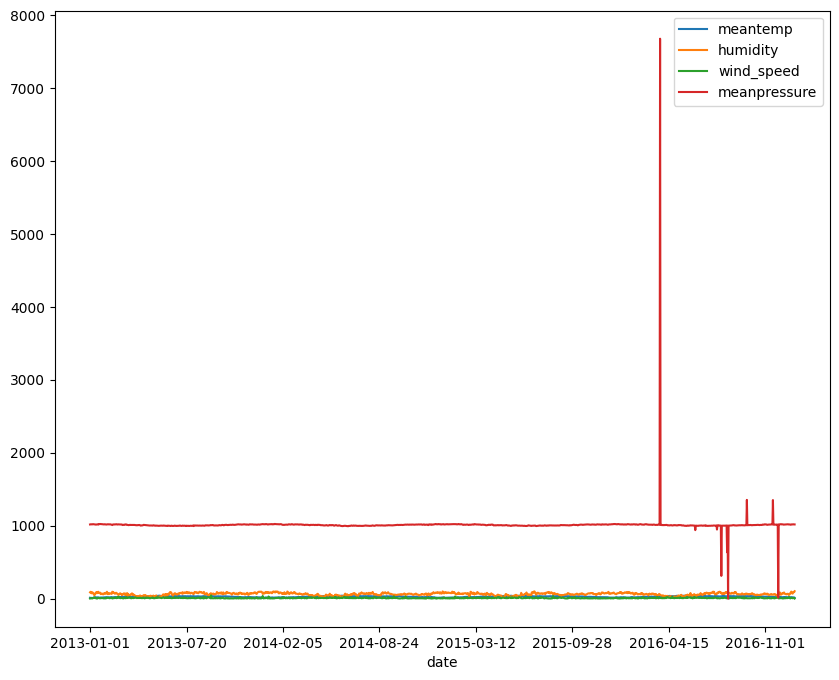

In [13]:
df_train.plot(figsize=(10, 8))
plt.show()

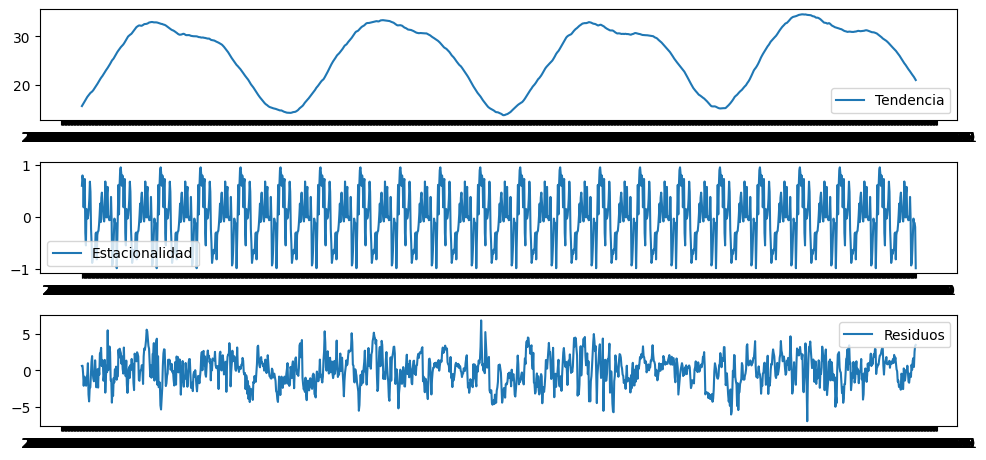

In [14]:
# Descomposición
decomposition = seasonal_decompose(df_train['meantemp'], model='additive', period=70)

# Gráfica de la tendencia
plt.figure(figsize=(10, 6))
plt.subplot(411)
plt.plot(decomposition.trend, label='Tendencia')
plt.legend()

# Gráfica de la estacionalidad
plt.subplot(412)
plt.plot(decomposition.seasonal, label='Estacionalidad')
plt.legend()

# Gráfica de los residuos
plt.subplot(413)
plt.plot(decomposition.resid, label='Residuos')
plt.legend()

plt.tight_layout()
plt.show()